In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pyforest as pf

In [3]:
df=pd.read_csv(r"C:\Users\akash\OneDrive\Documents\dataset\apple_quality.csv.xls")

In [4]:
# pf.lazy_imports()

In [5]:
df=pd.read_csv(r'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [6]:
df.shape

(41188, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [9]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [10]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [11]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [12]:
df['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [13]:
df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [14]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [15]:
df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [16]:
df['month'].unique()

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

In [17]:
df['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [18]:
# education
df['education']=df['education'].replace(['basic.4y','basic.6y','basic.9y'],'Basic')

In [19]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [20]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

- Most of the people are Married

Text(0.5, 1.0, 'Marital status')

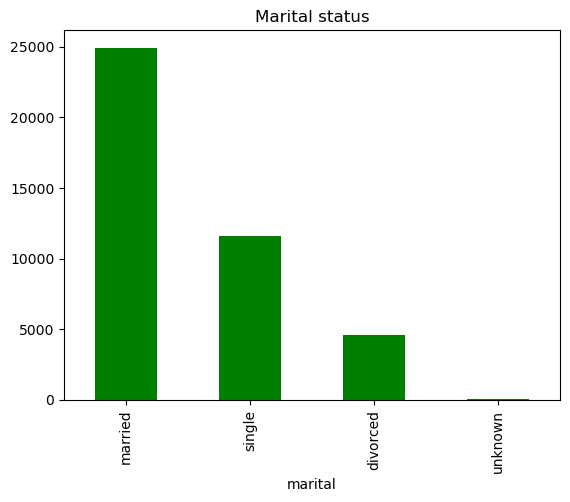

In [21]:
df['marital'].value_counts().plot.bar(color='green')
plt.title('Marital status')

In [22]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

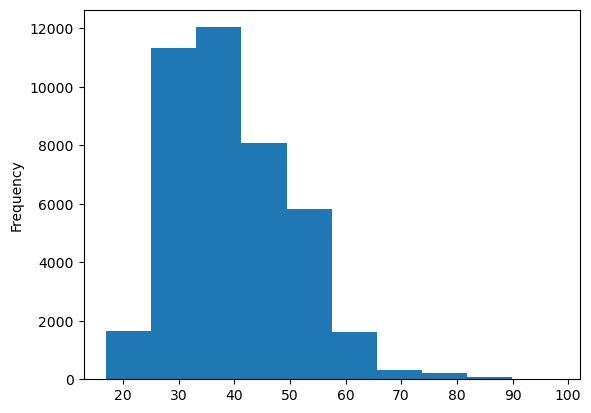

In [23]:
df['age'].plot.hist()

In [24]:
df['age'].median()

38.0

- most of people are in 38 age group

In [25]:
df['education'].value_counts()

education
Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [26]:
df.groupby('education')['age'].agg(['median','max','min'])

,median,max,min
education,,,
Basic,41.0,98,17
high.school,36.0,88,18
illiterate,48.0,80,34
professional.course,38.0,86,20
university.degree,36.0,91,20
unknown,43.0,92,17


- Most of the people have Basic education

In [27]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

<Axes: ylabel='count'>

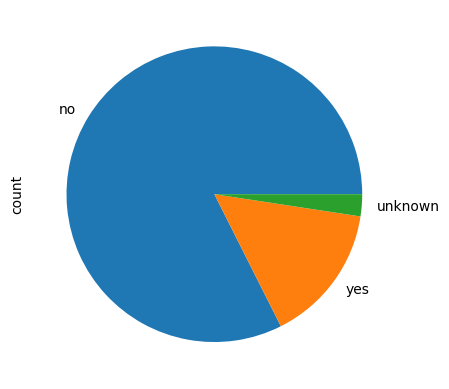

In [28]:
df['loan'].value_counts().plot.pie()

- Higher number of people have no loan

In [29]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [30]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

<Axes: ylabel='contact'>

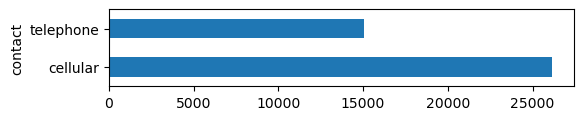

In [31]:
df['contact'].value_counts().plot.barh(figsize=(6,1))

In [32]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

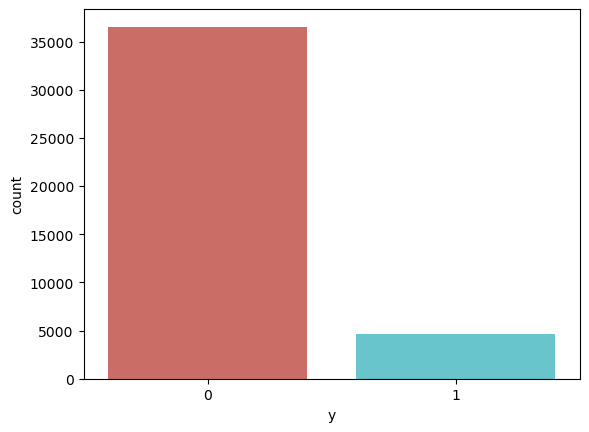

In [33]:
sns.countplot(x='y',data=df,palette='hls')
plt.show()

In [34]:
count_no_sub =len(df[df['y']==0])
count_sub =len(df[df['y']==1])
count_sub_NoSub = len(df['y'])
prcnt_no_sub = (count_no_sub/count_sub_NoSub)*100
prcnt_sub = (count_sub/count_sub_NoSub)*100
print(f'percentage of subscription {prcnt_sub} %')
print(f'percentage of no subscription {prcnt_no_sub} %')

percentage of subscription 11.265417111780131 %
percentage of no subscription 88.73458288821988 %


The ratio of no-subscription to subscription instances is 89:11

In [35]:
df.groupby('education')[['age','duration','campaign','pdays','y']].mean()

,age,duration,campaign,pdays,y
education,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.145003


In [36]:
df.groupby('job')[['age','duration','campaign','pdays','y']].mean()

,age,duration,campaign,pdays,y
job,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.314286


In [37]:
df.groupby('marital')[['age','duration','campaign','pdays','y']].mean()

,age,duration,campaign,pdays,y
marital,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.150000


Text(0, 0.5, 'Frequency of Purchase')

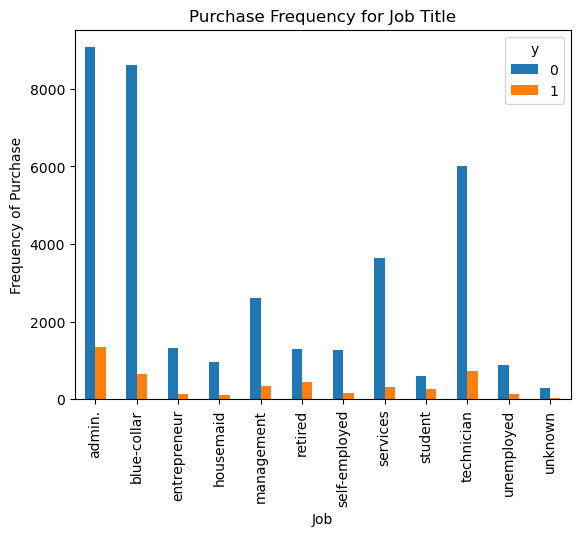

In [38]:
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

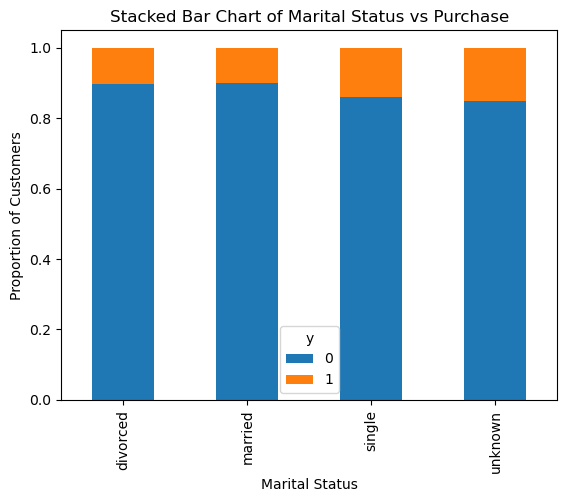

In [39]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

The marital status does not seem a strong predictor for the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

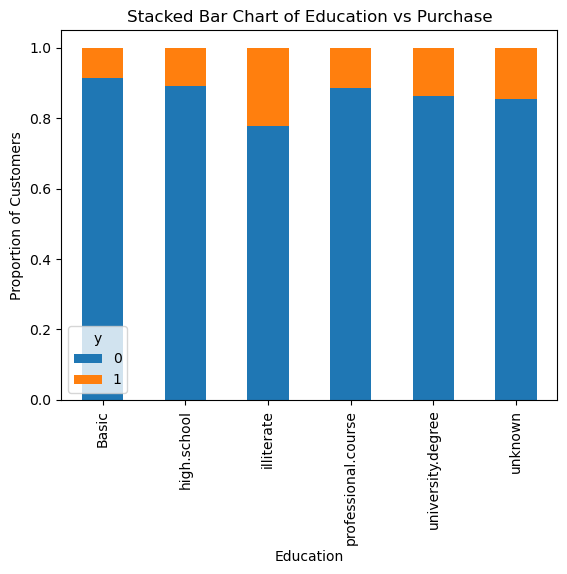

In [40]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Education seems a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

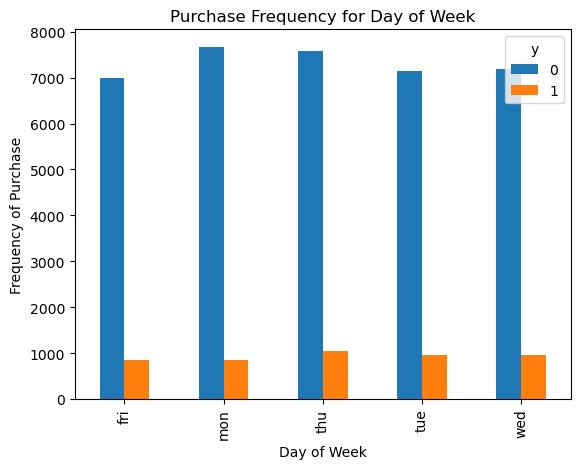

In [41]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

Day of week may not be a good predictor of the outcome.

Text(0, 0.5, 'Frequency of Purchase')

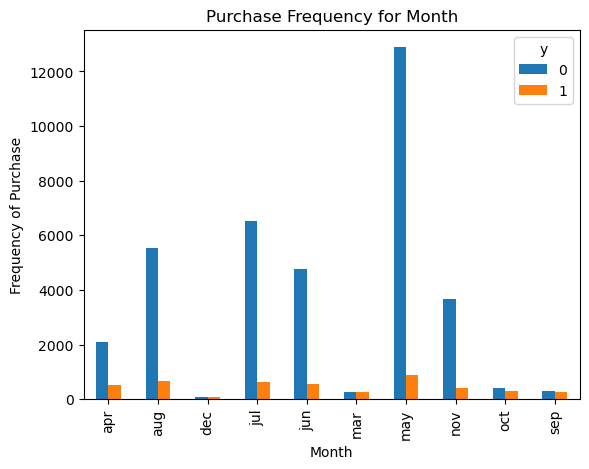

In [42]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Month might be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

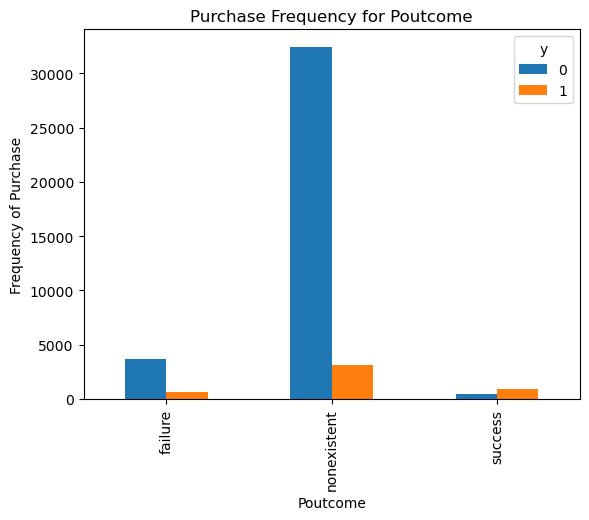

In [43]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

Poutcome seems to be a good predictor of the outcome variable

In [44]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [45]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [46]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [47]:
df_fuel_enc = ohe.fit_transform(df[['job']])
df_fuel_enc.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
df_fuel_enc = pd.DataFrame(df_fuel_enc.toarray(),columns= ohe.get_feature_names_out(['job']))
df_fuel_enc.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df = pd.concat([df,df_fuel_enc],axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [51]:
df_edu_enc = ohe.fit_transform(df[['education']])
df_edu_enc.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [52]:
df_edu_enc = pd.DataFrame(df_edu_enc.toarray(),columns= ohe.get_feature_names_out(['education']))
df_edu_enc.head()

,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df = pd.concat([df,df_edu_enc],axis=1)

In [54]:
df.drop(columns=['education','job'],inplace=True)

In [55]:
df['pdays'].unique()

array([999,   6,   3,   2,   4,  16,   0,   5,  11,  14,  13,   9,  15,
        17,  12,  26,   7,  19,  10,   1,  18,   8,  20,  21,  22,  25,
        27], dtype=int64)

In [56]:
df['pdays']=df['pdays'].replace([999],-1)

In [57]:
df['pdays'].unique()

array([-1,  6,  3,  2,  4, 16,  0,  5, 11, 14, 13,  9, 15, 17, 12, 26,  7,
       19, 10,  1, 18,  8, 20, 21, 22, 25, 27], dtype=int64)

In [58]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [59]:
df['pdays'] = Scaler.fit_transform(df[['pdays']])

In [60]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [61]:
df_mar_enc = ohe.fit_transform(df[['marital']])
df_mar_enc.toarray()

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [62]:
df_mar_enc = pd.DataFrame(df_mar_enc.toarray(),columns= ohe.get_feature_names_out(['marital']))
df_mar_enc.head()

,marital_divorced,marital_married,marital_single,marital_unknown
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [63]:
df = pd.concat([df,df_mar_enc],axis=1)
df.head()

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,...,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,44,married,unknown,yes,no,cellular,aug,thu,210,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,53,married,no,no,no,cellular,nov,fri,138,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,28,single,no,yes,no,cellular,jun,thu,339,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,39,married,no,no,no,cellular,apr,fri,185,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,55,married,no,yes,no,cellular,aug,fri,137,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
df['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [65]:
df_def_enc = ohe.fit_transform(df[['default']])
df_def_enc.toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [66]:
df_def_enc = pd.DataFrame(df_def_enc.toarray(),columns= ohe.get_feature_names_out(['default']))
df_def_enc.head()

,default_no,default_unknown,default_yes
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [67]:
df = pd.concat([df,df_def_enc],axis=1)

In [68]:
df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [69]:
df_hou_enc = ohe.fit_transform(df[['housing']])
df_hou_enc.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [70]:
df_hou_enc = pd.DataFrame(df_hou_enc.toarray(),columns= ohe.get_feature_names_out(['housing']))
df_hou_enc.head()

,housing_no,housing_unknown,housing_yes
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [71]:
df = pd.concat([df,df_hou_enc],axis=1)

In [72]:
df.drop(columns=['housing','default','marital'],inplace=True)

In [73]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [74]:
df_loan_enc = ohe.fit_transform(df[['loan']])
df_loan_enc.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [75]:
df_loan_enc = pd.DataFrame(df_loan_enc.toarray(),columns= ohe.get_feature_names_out(['loan']))
df_loan_enc.head()

,loan_no,loan_unknown,loan_yes
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [76]:
df = pd.concat([df,df_loan_enc],axis=1)

In [77]:
df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [78]:
df_contact_enc = ohe.fit_transform(df[['contact']])
df_contact_enc.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [79]:
df_contact_enc = pd.DataFrame(df_contact_enc.toarray(),columns= ohe.get_feature_names_out(['contact']))
df_contact_enc.head()

,contact_cellular,contact_telephone
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [80]:
df = pd.concat([df,df_contact_enc],axis=1)

In [81]:
df['month'].unique()

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

In [82]:
df_month_enc = ohe.fit_transform(df[['month']])
df_month_enc.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
df_month_enc = pd.DataFrame(df_month_enc.toarray(),columns= ohe.get_feature_names_out(['month']))
df_month_enc.head()

,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df = pd.concat([df,df_month_enc],axis=1)

In [85]:
df['day_of_week'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [86]:
df_day_enc = ohe.fit_transform(df[['day_of_week']])
df_day_enc.toarray()

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [87]:
df_day_enc = pd.DataFrame(df_day_enc.toarray(),columns= ohe.get_feature_names_out(['day_of_week']))
df_day_enc.head()

,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [88]:
df = pd.concat([df,df_day_enc],axis=1)

In [89]:
df.drop(columns=['day_of_week','contact','month'],inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   loan                           41188 non-null  object 
 2   duration                       41188 non-null  int64  
 3   campaign                       41188 non-null  int64  
 4   pdays                          41188 non-null  float64
 5   previous                       41188 non-null  int64  
 6   poutcome                       41188 non-null  object 
 7   emp_var_rate                   41188 non-null  float64
 8   cons_price_idx                 41188 non-null  float64
 9   cons_conf_idx                  41188 non-null  float64
 10  euribor3m                      41188 non-null  float64
 11  nr_employed                    41188 non-null  float64
 12  y                              41188 non-null 

In [91]:
df['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [92]:
df_poutcome_enc = ohe.fit_transform(df[['poutcome']])
df_poutcome_enc.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [93]:
df_poutcome_enc = pd.DataFrame(df_poutcome_enc.toarray(),columns= ohe.get_feature_names_out(['poutcome']))
df_poutcome_enc.head()

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [94]:
df = pd.concat([df,df_poutcome_enc],axis=1)

In [95]:
df.drop(columns=['loan','poutcome'],inplace=True)

In [96]:
df

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,-0.170834,0,1.4,93.444,-36.1,4.963,5228.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,53,138,1,-0.170834,0,-0.1,93.200,-42.0,4.021,5195.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,339,3,4.463981,2,-1.7,94.055,-39.8,0.729,4991.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,39,185,2,-0.170834,0,-1.8,93.075,-47.1,1.405,5099.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,55,137,1,2.477632,1,-2.9,92.201,-31.4,0.869,5076.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,-0.170834,0,1.4,94.465,-41.8,4.866,5228.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
41184,31,196,2,-0.170834,0,1.1,93.994,-36.4,4.860,5191.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
41185,42,62,3,-0.170834,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41186,48,200,2,-0.170834,0,-3.4,92.431,-26.9,0.742,5017.5,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [97]:
df['age'] = Scaler.fit_transform(df[['age']])
df['duration'] = Scaler.fit_transform(df[['duration']])
df['campaign'] = Scaler.fit_transform(df[['campaign']])
df['cons_price_idx'] = Scaler.fit_transform(df[['cons_price_idx']])
df['cons_conf_idx'] = Scaler.fit_transform(df[['cons_conf_idx']])
df['euribor3m'] = Scaler.fit_transform(df[['euribor3m']])
df['nr_employed'] = Scaler.fit_transform(df[['nr_employed']])
df['previous'] = Scaler.fit_transform(df[['previous']])
df['emp_var_rate'] = Scaler.fit_transform(df[['emp_var_rate']])

In [98]:
df

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.381527,-0.186230,-0.565922,-0.170834,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.245157,-0.463926,-0.565922,-0.170834,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.153816,0.311309,0.156105,4.463981,3.691766,-1.134279,0.828107,0.151810,-1.667578,-2.428157,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.098268,-0.282652,-0.204909,-0.170834,-0.349494,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.437075,-0.467783,-0.565922,2.477632,1.671136,-1.898153,-2.374889,1.966794,-1.586859,-1.257233,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.820911,-0.139947,-0.565922,-0.170834,-0.349494,0.839061,1.536429,-0.280328,0.717649,0.845170,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
41184,-0.865939,-0.240227,-0.204909,-0.170834,-0.349494,0.648092,0.722722,0.886447,0.714190,0.331680,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
41185,0.189609,-0.757050,0.156105,-0.170834,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41186,0.765363,-0.224799,-0.204909,-0.170834,-0.349494,-2.216433,-1.977538,2.939106,-1.660082,-2.069683,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [99]:
df = df.rename(columns= {'y':'subscription'})

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = df.drop('subscription',axis=1)
y = df['subscription']

In [102]:
X.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.381527,-0.186230,-0.565922,-0.170834,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.245157,-0.463926,-0.565922,-0.170834,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.153816,0.311309,0.156105,4.463981,3.691766,-1.134279,0.828107,0.151810,-1.667578,-2.428157,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.098268,-0.282652,-0.204909,-0.170834,-0.349494,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.437075,-0.467783,-0.565922,2.477632,1.671136,-1.898153,-2.374889,1.966794,-1.586859,-1.257233,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [103]:
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: subscription, Length: 41188, dtype: int64

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=7)

In [105]:
X_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
8871,-1.345734,-0.205515,-0.204909,-0.170834,-0.349494,0.648092,0.722722,0.886447,0.713036,0.331680,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
23616,-0.482104,-0.078237,0.156105,-0.170834,-0.349494,0.839061,1.536429,-0.280328,0.775881,0.845170,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11023,-0.769980,-0.926753,-0.565922,-0.170834,1.671136,-1.197935,-1.179380,-1.231034,-1.330867,-0.940281,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30525,1.724952,0.268883,-0.565922,-0.170834,-0.349494,0.839061,0.591424,-0.474791,0.772999,0.845170,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9932,-1.153816,1.788499,0.156105,-0.170834,-0.349494,0.839061,0.591424,-0.474791,0.772422,0.845170,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,-0.865939,-0.058953,-0.204909,-0.170834,-0.349494,0.839061,-0.227465,0.951267,0.774152,0.845170,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13927,1.724952,-0.606631,-0.565922,-0.170834,-0.349494,0.839061,-0.227465,0.951267,0.774152,0.845170,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
919,-0.194227,-0.710767,-0.204909,-0.170834,-0.349494,0.839061,-0.227465,0.951267,0.774152,0.845170,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
38467,0.477486,0.025899,0.517118,-0.170834,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [106]:
y_train

8871     0
23616    0
11023    0
30525    0
9932     0
        ..
34140    0
13927    0
919      0
38467    0
10742    0
Name: subscription, Length: 32950, dtype: int64

In [107]:
X_test

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
6576,0.957281,-0.660628,-0.565922,-0.170834,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36038,0.669404,-0.109092,0.517118,-0.170834,-0.349494,0.839061,-0.227465,0.951267,0.774728,0.845170,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18933,-0.290186,-0.811047,-0.204909,-0.170834,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23756,0.381527,-0.595061,-0.565922,-0.170834,-0.349494,-1.197935,-1.179380,-1.231034,-1.359118,-0.940281,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3699,-0.769980,0.083752,1.239145,-0.170834,-0.349494,0.839061,0.591424,-0.474791,0.776458,0.845170,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23840,0.861322,0.141606,-0.204909,-0.170834,-0.349494,0.839061,0.591424,-0.474791,0.772999,0.845170,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18941,1.245157,-0.668342,-0.565922,-0.170834,-0.349494,-2.216433,-2.067374,2.312505,-1.660659,-2.069683,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1273,-1.153816,-0.618202,-0.204909,-0.170834,-0.349494,0.839061,0.591424,-0.474791,0.772999,0.845170,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2456,0.477486,-0.687626,-0.565922,-0.170834,-0.349494,0.839061,0.591424,-0.474791,0.768963,0.845170,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [108]:
y_test

6576     0
36038    0
18933    0
23756    0
3699     0
        ..
23840    0
18941    0
1273     0
2456     0
32374    0
Name: subscription, Length: 8238, dtype: int64

In [120]:
from sklearn.linear_model import LogisticRegression

import warnings

warnings.filterwarnings('ignore')

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [110]:
y_pred = log_reg.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score,auc,recall_score,roc_auc_score,roc_curve

In [112]:
Accuracy = accuracy_score(y_test,y_pred)
Accuracy

0.9109007040543822

In [113]:
precision = precision_score(y_test,y_pred)
precision

0.6608084358523726

In [114]:
recall = recall_score(y_test, y_pred)
recall

0.4100327153762268

In [115]:
f1 = f1_score(y_test, y_pred)
f1

0.506056527590848

In [116]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[7128,  193],
       [ 541,  376]], dtype=int64)

In [117]:
y_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.9341316125449608

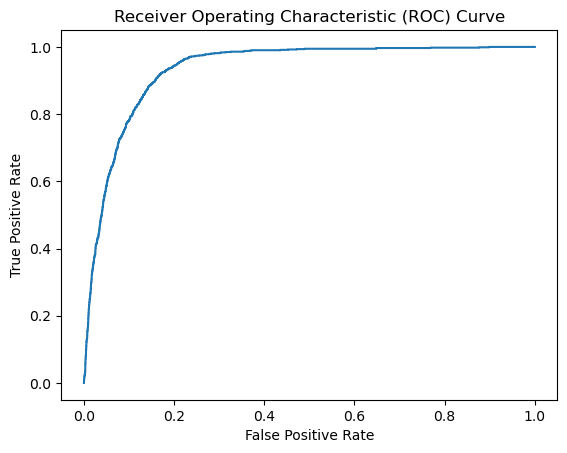

In [118]:
fpr, tpr,roc_auc = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

- Accuracy: 0.9109007040543822
- Precision: 0.6608084358523726
- Recall: 0.4100327153762268
- F1 Score: 0.506056527590848
- ROC AUC: [       inf 0.99999927 0.99998552 ... 0.00757455 0.00757356 0.00107693]
- Confusion Matrix: 
[[7128  193]
 [ 541  376]]

*The model achieves a high accuracy of 91%, but the precision (66%) and recall (41%) indicate that while it correctly identifies many true positive instances.*